In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

### Get the data

In [5]:
path = untar_data(URLs.PETS); path

PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations')]

In [7]:
path_img, path_anno = path.ls()

### Create ImageDataBunch

In [19]:
fnames = get_image_files(path_img); fnames[:3]

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Maine_Coon_100.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Bengal_82.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_180.jpg')]

In [21]:
np.random.seed(2)

In [22]:
pat = r'/([^/]+)_\d+.jpg$'

In [30]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, bs=64, size=224, ds_tfms=get_transforms()).normalize(imagenet_stats)

### Visualize data

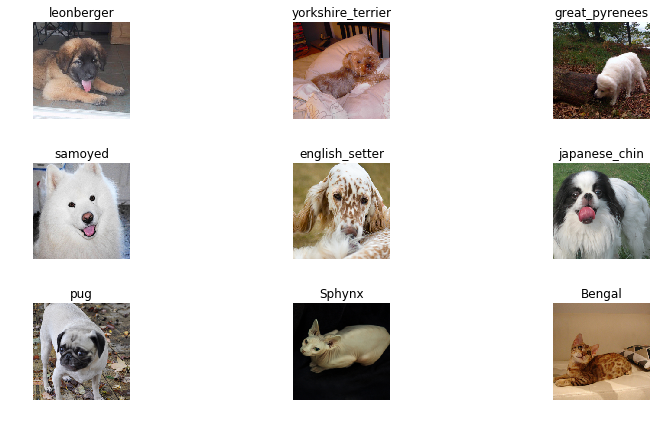

In [34]:
data.show_batch(3, figsize=(12,6))

In [36]:
data.classes[:5], len(data.classes), data.c

(['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair'], 37, 37)

### Create CNN learner

In [47]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [48]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.390125,0.339185,0.102842,00:22
1,0.537811,0.274491,0.081867,00:24
2,0.352630,0.227812,0.076455,00:23
3,0.257657,0.221801,0.075778,00:23


In [49]:
learn.save('34-stage-1')

### Show what it learned

In [54]:
interpret = learn.interpret()

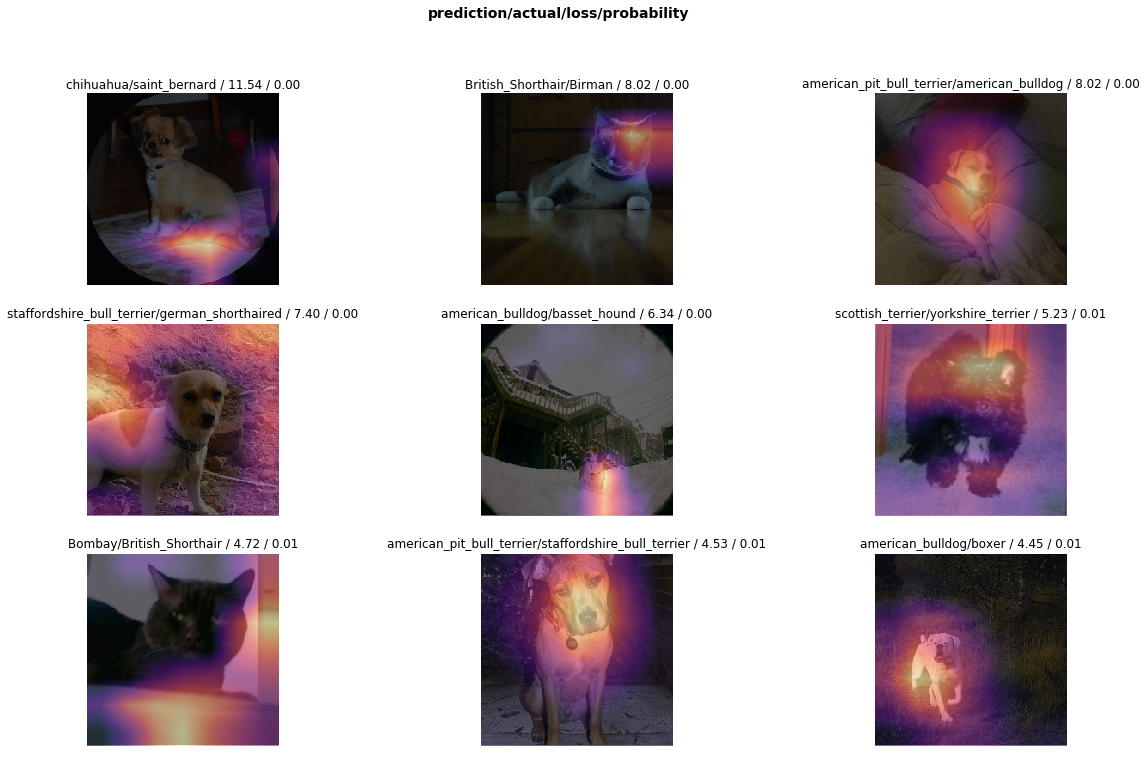

In [57]:
interpret.plot_top_losses(9, figsize=(20,12))

In [59]:
interpret.most_confused(min_val=2)

[('Bengal', 'Egyptian_Mau', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('american_bulldog', 'american_pit_bull_terrier', 5),
 ('Birman', 'Ragdoll', 4),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Ragdoll', 'Birman', 4),
 ('english_cocker_spaniel', 'english_setter', 4),
 ('Birman', 'Siamese', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Persian', 'Maine_Coon', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('boxer', 'american_bulldog', 2),
 ('english_cocker_spaniel', 'newfoundland', 2),
 ('english_setter', 'german_shorthaired', 2),
 ('yorkshire_terrier', 'havanese', 2)]

In [65]:
losses, idxs = interpret.top_losses()
len(losses), len(idxs), len(data.valid_ds)

(1478, 1478, 1478)

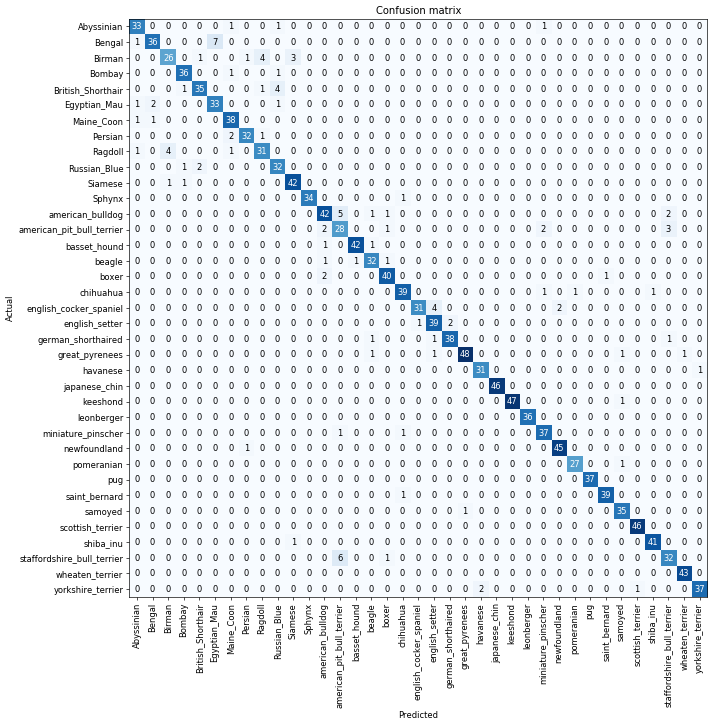

In [61]:
interpret.plot_confusion_matrix(figsize=(12,12), dpi=60)

### Continue training after unfreezing

In [67]:
learn.load('34-stage-1');

In [68]:
learn.unfreeze()

In [69]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


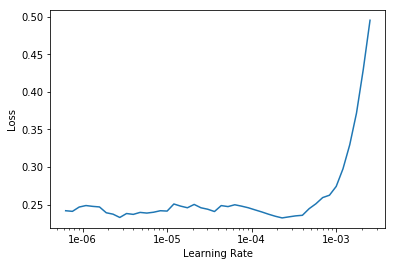

In [70]:
learn.recorder.plot()

In [71]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.227655,0.218450,0.072395,00:23
1,0.221970,0.210798,0.073748,00:24
2,0.191429,0.201703,0.068336,00:24
3,0.170772,0.201453,0.066306,00:24


In [72]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.175401,0.200685,0.062923,00:25
1,0.161868,0.196475,0.068336,00:24
2,0.144284,0.194509,0.063599,00:24
3,0.136177,0.193556,0.065629,00:25


### Try a ResNet 50

In [75]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, size=299, bs=bs//2, 
                              ds_tfms=get_transforms()).normalize(imagenet_stats)

In [76]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

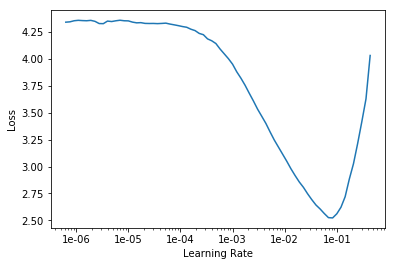

In [78]:
learn.lr_find()
learn.recorder.plot()

In [79]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.515609,0.244354,0.079838,00:50
1,0.278246,0.193633,0.063599,00:49


In [80]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.327721,0.225866,0.068336,00:48


KeyboardInterrupt: 

In [81]:
learn.save('50-stage-1')

#### Unfreeze

In [84]:
learn.load('50-stage-1');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


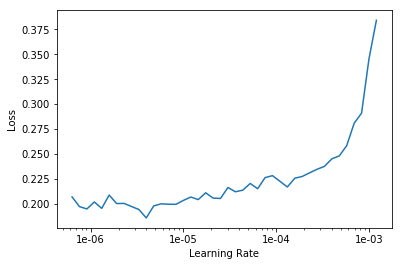

In [85]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [86]:
learn.fit_one_cycle(6, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.209823,0.179954,0.055480,01:03
1,0.177576,0.160672,0.054127,01:03
2,0.146053,0.161167,0.051421,01:03
3,0.118287,0.155396,0.052774,01:02
4,0.109796,0.148872,0.051421,01:03
5,0.095188,0.152389,0.049391,01:03
